# Artificial Neural Network (ANN)

Work by: Raghavendra Tapas

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

## Data Preprocessing

### Importing the dataset

* x - all the features except exited column
* y - value to be predicted

In [22]:
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [23]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [25]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding Categorical Data

Label Encoding the "Gender" column

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [27]:
type(x)

numpy.ndarray

One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Building the ANN

How many neurons to choose is a trial and error process in deep learning.

* **1st layer:** `rectifier` activation function, `6` neurons
* **2nd layer:** `rectifier` activation function, `6` neurons
* **Output layer:** `sigmoid` activation function,  `1` neuron, because the variable we are trying to predict is `binary classification` problem.

i.e. Whether or not the customer leaves the bank. (Yes or No)

### Initializing the ANN

In [28]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

* `Adam optimizer`: Adaptive Moment Estimation or Adam optimizer combines two gradient descent methodologies. Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters.

* `Binary Cross-Entropy`: Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events. Since we’re trying to compute a loss, we need to penalize bad predictions. If the probability associated with the true class is 1.0, we need its loss to be zero. Conversely, if that probability is low, say, 0.01, we need its loss to be huge.

### Compiling the ANN

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

* Batch gradient descent is faster to compute. Usually batch size is taken to be 32.
* One epoch consists of one full training cycle on the training set. Once every sample in the set is seen, you start again - marking the beginning of the 2nd epoch.

In [34]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3358 - accuracy: 0.8650
Epoch 2/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3339 - accuracy: 0.8644
Epoch 3/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3332 - accuracy: 0.8671
Epoch 4/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3335 - accuracy: 0.8636
Epoch 5/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3327 - accuracy: 0.8671
Epoch 6/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3327 - accuracy: 0.8670
Epoch 7/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3319 - accuracy: 0.8666
Epoch 8/100
667/667 [==============================] - 2s 3ms/step - loss: 0.3325 - accuracy: 0.8643
Epoch 9/100
667/667 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8639
Epoch 10/100
667/667 [==============================] - 2s 2ms/step - loss: 0.3317 - accura

Epoch 100/100
667/667 [==============================] - 3s 4ms/step - loss: 0.3274 - accuracy: 0.8659

## Making the predictions and evaluating the model

### Predicting the result of a single observation

Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

Use our ANN model to predict if the customer with the following informations will leave the bank: 

* Geography: France 
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: \$ 60000, 
* Number of Products: 2, 
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

* Assumption: Threshold Probability = 0.5
* Less than 0.5 = False. The person will not leave the bank
* More than 0.5 = True. The person will leave the bank

In [39]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [40]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

[[0.07359219]]


* Geography: Spain ---> [0,1,0]
* Credit Score: 750
* Gender: Female
* Age: 35 years old
* Tenure: 10 years
* Balance: \$ 70000, 
* Number of Products: 4, 
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: No
* Estimated Salary: \$ 50000

In [36]:
print(ann.predict(sc.transform([[0, 1, 0, 750, 1, 35, 10, 70000, 4, 1, 0, 50000]])) > 0.5)

[[ True]]


In [41]:
print(ann.predict(sc.transform([[0, 1, 0, 750, 1, 35, 10, 70000, 4, 1, 0, 50000]])))

[[0.8739985]]


### Predicting the Test set results

In [19]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1500   95]
 [ 183  222]]


0.861

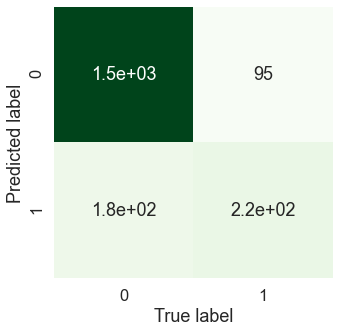

In [49]:
import matplotlib.pyplot as plt
def plot_conf_mat(conf_mat):
    """
    Function that Plots a confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(conf_mat, annot=True, cbar = False, cmap="Greens")
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(cm)